<a href="https://colab.research.google.com/github/ADRIANATORREZANI/ADRIANATORREZANI/blob/main/Adriana_Algoritmos_N%C3%A3o_Supervisionados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - K-Means

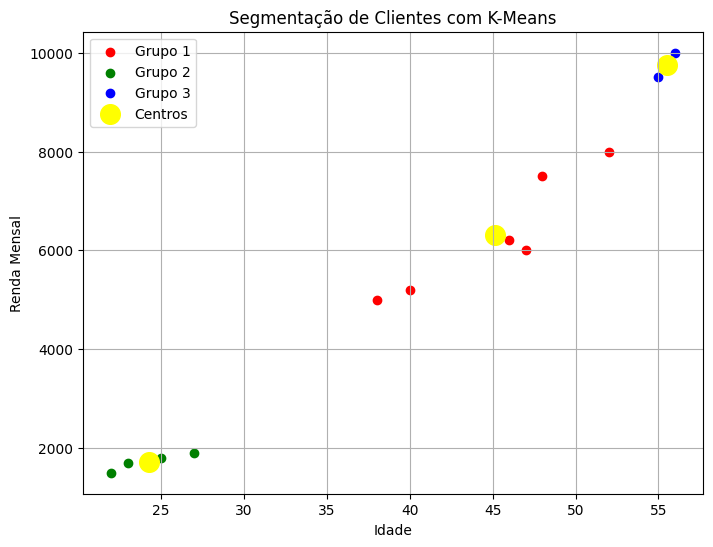

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Criando um DataFrame com dados fictícios de clientes
dados = pd.DataFrame({
    'Idade': [22, 25, 47, 52, 46, 56, 23, 27, 48, 55, 38, 40],
    'Renda': [1500, 1800, 6000, 8000, 6200, 10000, 1700, 1900, 7500, 9500, 5000, 5200]
})

# Aplicando K-Means com 3 grupos (K = 3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(dados)

# Adicionando o rótulo do grupo (cluster) a cada cliente
dados['Grupo'] = kmeans.labels_

# Visualizando os grupos
cores = ['red', 'green', 'blue']
plt.figure(figsize=(8, 6))
for i in range(3):
    grupo = dados[dados['Grupo'] == i]
    plt.scatter(grupo['Idade'], grupo['Renda'], label=f'Grupo {i+1}', color=cores[i])

# Adicionando os centros dos clusters
centros = kmeans.cluster_centers_
plt.scatter(centros[:, 0], centros[:, 1], s=200, c='yellow', label='Centros')
plt.xlabel('Idade')
plt.ylabel('Renda Mensal')
plt.title('Segmentação de Clientes com K-Means')
plt.legend()
plt.grid(True)
plt.show()

# Entendendo visualmente a quantidade ideal de clusters (K)

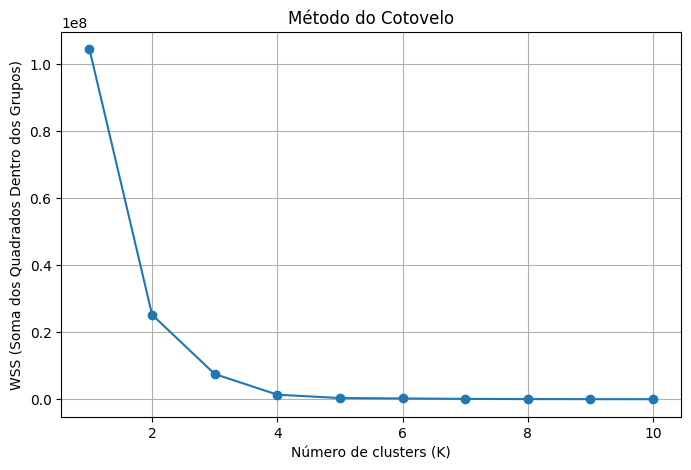

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Dados fictícios de clientes
dados = pd.DataFrame({
    'Idade': [22, 25, 47, 52, 46, 56, 23, 27, 48, 55, 38, 40],
    'Renda': [1500, 1800, 6000, 8000, 6200, 10000, 1700, 1900, 7500, 9500, 5000, 5200]
})

# --- Etapa 1: Método do Cotovelo ---
wss = []  # Lista para armazenar o WSS para cada valor de K

# Testando de K=1 a K=10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dados)
    wss.append(kmeans.inertia_)  # WSS = inertia_

# Plot do gráfico do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wss, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters (K)')
plt.ylabel('WSS (Soma dos Quadrados Dentro dos Grupos)')
plt.grid(True)
plt.show()

In [ ]:
pip install kneed

Número ideal de clusters (K): 3


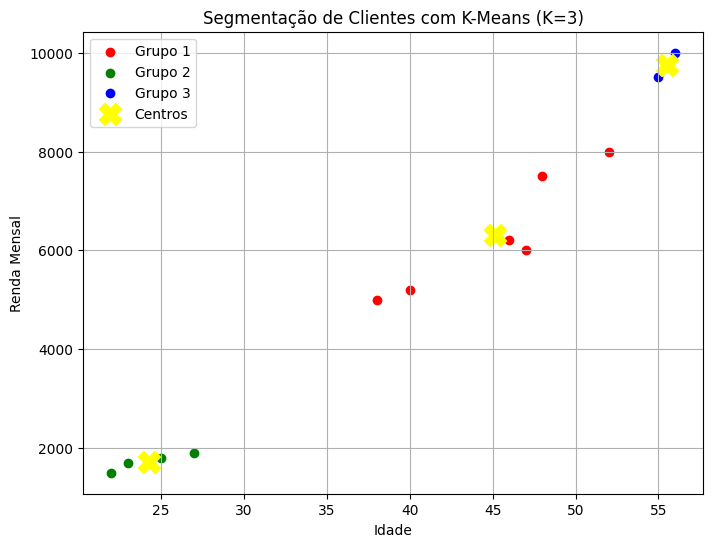

Silhouette Score: 0.68


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Dados fictícios de clientes
dados = pd.DataFrame({
    'Idade': [22, 25, 47, 52, 46, 56, 23, 27, 48, 55, 38, 40],
    'Renda': [1500, 1800, 6000, 8000, 6200, 10000, 1700, 1900, 7500, 9500, 5000, 5200]
})

# --- Etapa 1: Método do Cotovelo ---
wss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dados)
    wss.append(kmeans.inertia_)

# Encontrando automaticamente o "cotovelo"
kl = KneeLocator(K_range, wss, curve='convex', direction='decreasing')
k_ideal = kl.elbow
print(f'Número ideal de clusters (K): {k_ideal}')

# --- Etapa 2: Aplicando KMeans com o K ideal ---
kmeans_final = KMeans(n_clusters=k_ideal, random_state=42)
dados['Grupo'] = kmeans_final.fit_predict(dados)

# --- Etapa 3: Visualizando os grupos ---
plt.figure(figsize=(8, 6))
cores = ['red', 'green', 'blue', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'pink', 'gray']

for i in range(k_ideal):
    grupo = dados[dados['Grupo'] == i]
    plt.scatter(grupo['Idade'], grupo['Renda'], label=f'Grupo {i+1}', color=cores[i])

# Centros dos clusters
centros = kmeans_final.cluster_centers_
plt.scatter(centros[:, 0], centros[:, 1], s=250, c='yellow', marker='X', label='Centros')

plt.xlabel('Idade')
plt.ylabel('Renda Mensal')
plt.title(f'Segmentação de Clientes com K-Means (K={k_ideal})')
plt.legend()
plt.grid(True)
plt.show()

from sklearn.metrics import silhouette_score

score = silhouette_score(dados, kmeans_final.labels_)
print(f"Silhouette Score: {score:.2f}")

In [ ]:
'''
Silhouette Score (Coeficiente de Silhueta)
Mede o quão bem cada ponto está no seu cluster em comparação com os clusters
vizinhos.

Varia de -1 a 1:

🟢 Perto de 1 → ponto bem agrupado.

🟡 Perto de 0 → ponto na fronteira entre clusters.

🔴 Negativo → ponto pode estar no cluster errado.

'''

In [ ]:
'''
Tema do Projeto: Segmentação de Clientes com K-Means
Base de Dados:
Usaremos a base "Mall Customers", com dados de clientes de um shopping center. Ela contém:

CustomerID

Gender

Age

Annual Income (k$)

Spending Score (1-100)

Link direto para o dataset:
'https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv'
'''

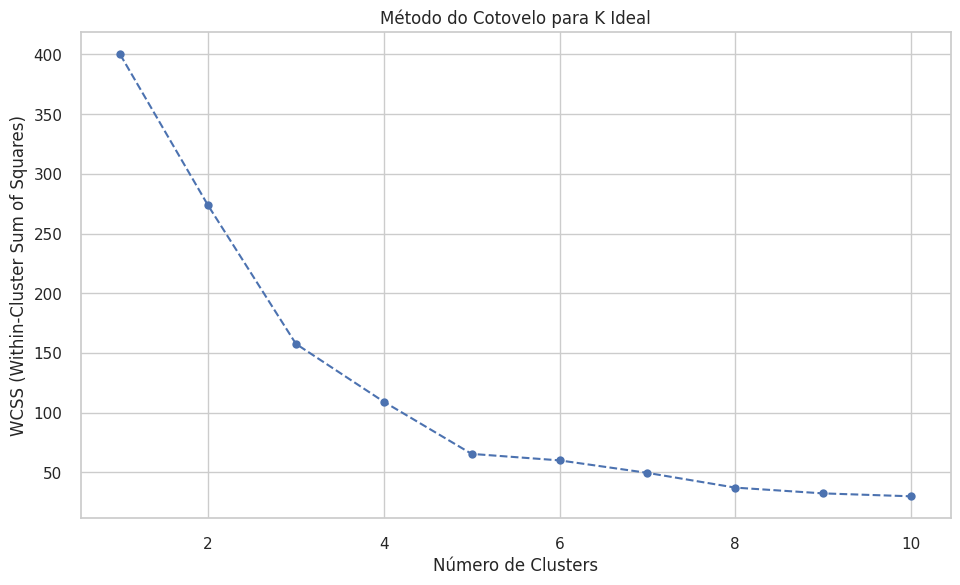

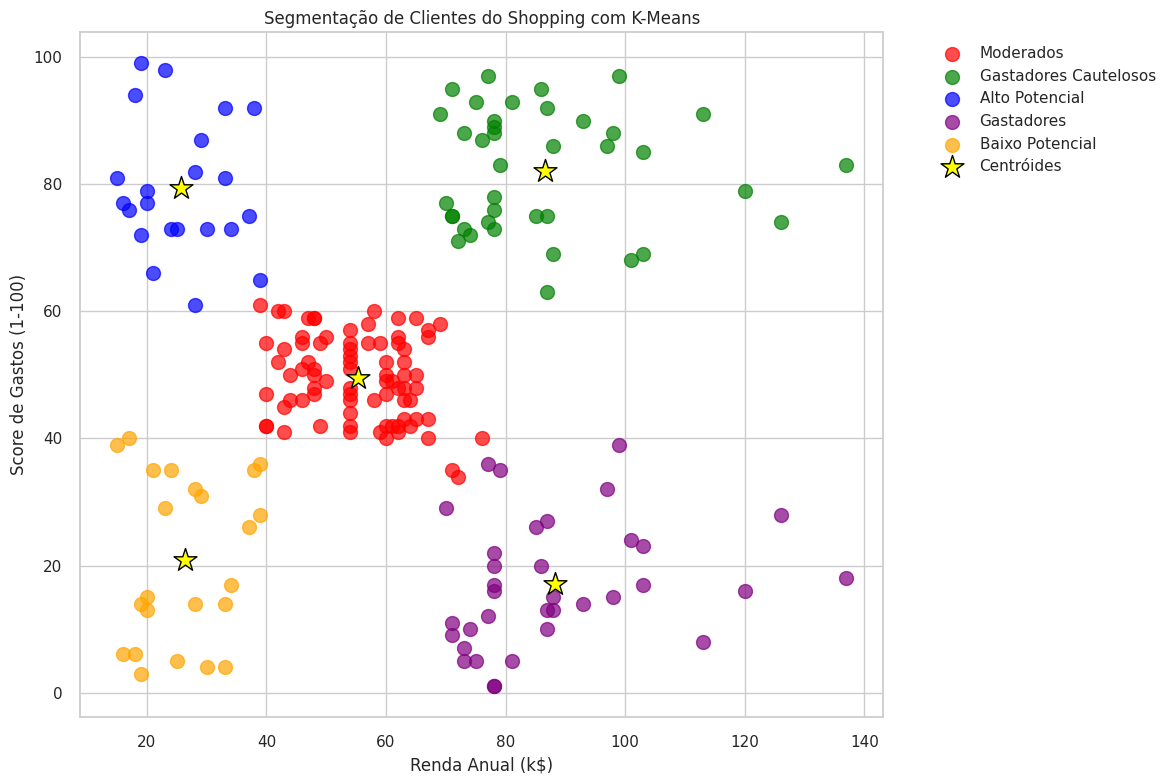


Tamanho de cada grupo:
Grupo
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64

Características médias por grupo:
       Idade  Renda  Score_Gastos
Grupo                            
0       42.7   55.3          49.5
1       32.7   86.5          82.1
2       25.3   25.7          79.4
3       41.1   88.2          17.1
4       45.2   26.3          20.9


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Carregar os dados reais
url = 'https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv'
dados = pd.read_csv(url)

# Renomear colunas para facilitar
dados.rename(columns={
    'Annual Income (k$)': 'Renda',
    'Spending Score (1-100)': 'Score_Gastos',
    'Age': 'Idade'
}, inplace=True)

# Selecionar features para clusterização (Renda e Score de Gastos)
X = dados[['Renda', 'Score_Gastos']]

# Padronizar os dados (importante para K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determinar o número ideal de clusters usando o método do cotovelo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo para K Ideal')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# Aplicando K-Means com 5 grupos (baseado no método do cotovelo)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Adicionando o rótulo do grupo (cluster) a cada cliente
dados['Grupo'] = kmeans.labels_

# Visualizando os grupos
plt.figure(figsize=(12, 8))
cores = ['red', 'green', 'blue', 'purple', 'orange']
nomes_grupos = ['Moderados', 'Gastadores Cautelosos', 'Alto Potencial', 'Gastadores', 'Baixo Potencial']

for i in range(5):
    grupo = dados[dados['Grupo'] == i]
    plt.scatter(grupo['Renda'], grupo['Score_Gastos'],
               label=nomes_grupos[i], color=cores[i], alpha=0.7, s=100)

# Adicionando os centros dos clusters
centros = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centros[:, 0], centros[:, 1], s=300, c='yellow', label='Centróides', marker='*', edgecolor='black')

plt.xlabel('Renda Anual (k$)')
plt.ylabel('Score de Gastos (1-100)')
plt.title('Segmentação de Clientes do Shopping com K-Means')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Análise descritiva dos grupos
print("\nTamanho de cada grupo:")
print(dados['Grupo'].value_counts().sort_index())

print("\nCaracterísticas médias por grupo:")
print(dados.groupby('Grupo')[['Idade', 'Renda', 'Score_Gastos']].mean().round(1))



In [ ]:
dados

,CustomerID,Gender,Idade,Renda,Score_Gastos,Grupo
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


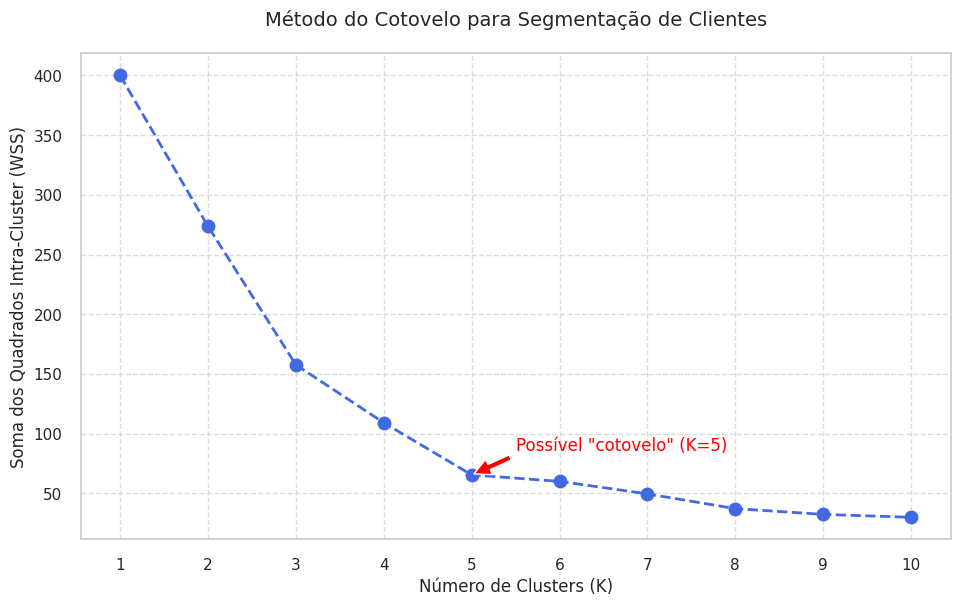


Valores de WSS para cada K:
    K    WSS
0   1  400.0
1   2  273.7
2   3  157.7
3   4  109.2
4   5   65.6
5   6   60.1
6   7   49.7
7   8   37.3
8   9   32.5
9  10   30.1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Carregar os dados reais do shopping
url = 'https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv'
dados = pd.read_csv(url)

# Renomear colunas para facilitar
dados.rename(columns={
    'Annual Income (k$)': 'Renda',
    'Spending Score (1-100)': 'Score_Gastos',
    'Age': 'Idade'
}, inplace=True)

# Selecionar features para clusterização (Renda e Score de Gastos)
X = dados[['Renda', 'Score_Gastos']]

# Padronizar os dados (importante para K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Etapa 1: Método do Cotovelo ---
wss = []  # Lista para armazenar o WSS para cada valor de K

# Testando de K=1 a K=10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wss.append(kmeans.inertia_)  # WSS = inertia_

# Plot do gráfico do cotovelo melhorado
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wss, marker='o', linestyle='--', color='royalblue', linewidth=2, markersize=10)
plt.title('Método do Cotovelo para Segmentação de Clientes', fontsize=14, pad=20)
plt.xlabel('Número de Clusters (K)', fontsize=12)
plt.ylabel('Soma dos Quadrados Intra-Cluster (WSS)', fontsize=12)
plt.xticks(range(1, 11))
plt.grid(True, linestyle='--', alpha=0.7)

# Destacar o ponto do cotovelo (K=5)
plt.annotate('Possível "cotovelo" (K=5)',
             xy=(5, wss[4]),
             xytext=(5.5, wss[4]+20),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color='red')

plt.show()

# Mostrar os valores de WSS em uma tabela
print("\nValores de WSS para cada K:")
wss_table = pd.DataFrame({'K': range(1, 11), 'WSS': wss})
print(wss_table.round(1))

In [ ]:
pip install kneed

Número ideal de clusters (K): 5


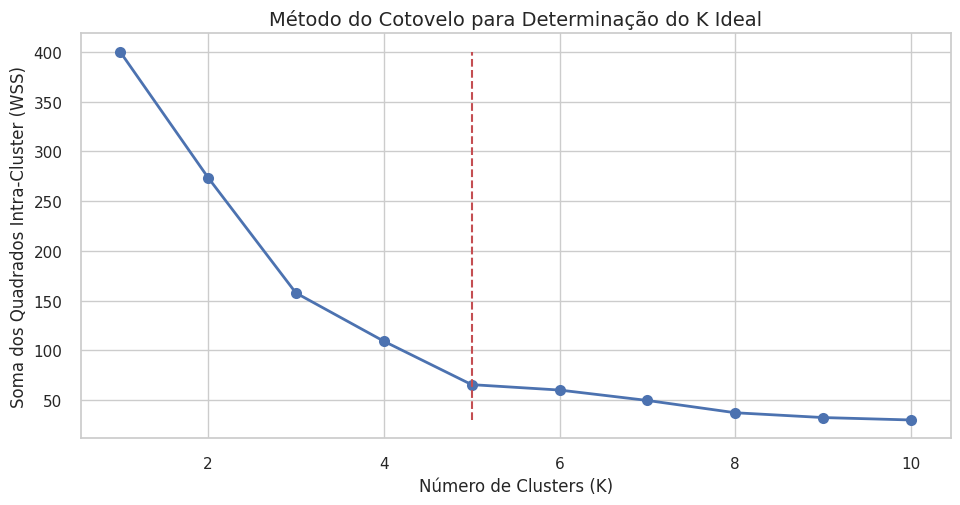

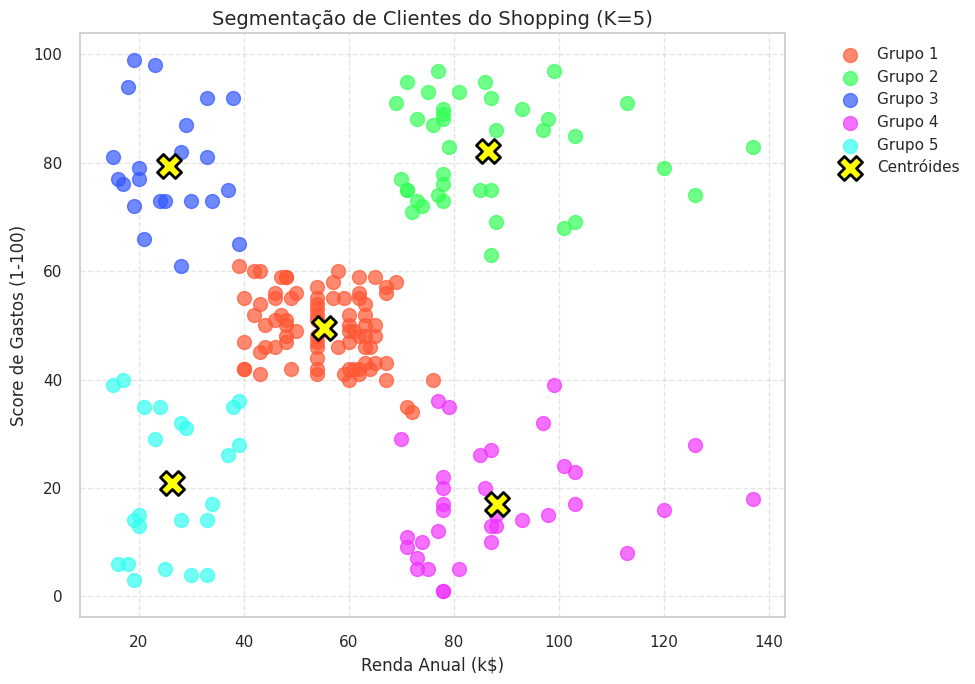


Silhouette Score: 0.55

Tamanho dos Grupos:
Grupo
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64

Características Médias por Grupo:
       Idade  Renda  Score_Gastos
Grupo                            
0       42.7   55.3          49.5
1       32.7   86.5          82.1
2       25.3   25.7          79.4
3       41.1   88.2          17.1
4       45.2   26.3          20.9


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Carregar os dados reais do shopping
url = 'https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv'
dados = pd.read_csv(url)

# Renomear colunas para facilitar
dados.rename(columns={
    'Annual Income (k$)': 'Renda',
    'Spending Score (1-100)': 'Score_Gastos',
    'Age': 'Idade'
}, inplace=True)

# Selecionar features para clusterização
X = dados[['Renda', 'Score_Gastos']]  # Usando Renda e Score de Gastos

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Etapa 1: Método do Cotovelo Automatizado ---
wss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wss.append(kmeans.inertia_)

# Encontrando automaticamente o "cotovelo"
kl = KneeLocator(K_range, wss, curve='convex', direction='decreasing')
k_ideal = kl.elbow
print(f'Número ideal de clusters (K): {k_ideal}')

# Plot do método do cotovelo
plt.figure(figsize=(10, 5))
plt.plot(K_range, wss, 'bo-', linewidth=2, markersize=8)
plt.vlines(k_ideal, ymin=min(wss), ymax=max(wss), colors='r', linestyles='dashed')
plt.xlabel('Número de Clusters (K)', fontsize=12)
plt.ylabel('Soma dos Quadrados Intra-Cluster (WSS)', fontsize=12)
plt.title('Método do Cotovelo para Determinação do K Ideal', fontsize=14)
plt.grid(True)
plt.show()

# --- Etapa 2: Aplicando KMeans com o K ideal ---
kmeans_final = KMeans(n_clusters=k_ideal, random_state=42)
dados['Grupo'] = kmeans_final.fit_predict(X_scaled)

# --- Etapa 3: Visualizando os grupos ---
plt.figure(figsize=(10, 7))
cores = ['#FF5733', '#33FF57', '#3357FF', '#F033FF', '#33FFF0', '#FF33A8', '#A833FF', '#33FFBD', '#FF8C33', '#3385FF']

for i in range(k_ideal):
    grupo = dados[dados['Grupo'] == i]
    plt.scatter(grupo['Renda'], grupo['Score_Gastos'],
                label=f'Grupo {i+1}', color=cores[i], alpha=0.7, s=100)

# Centros dos clusters (convertidos para escala original)
centros = scaler.inverse_transform(kmeans_final.cluster_centers_)
plt.scatter(centros[:, 0], centros[:, 1], s=300, c='yellow', marker='X',
            edgecolor='black', linewidth=2, label='Centróides')

plt.xlabel('Renda Anual (k$)', fontsize=12)
plt.ylabel('Score de Gastos (1-100)', fontsize=12)
plt.title(f'Segmentação de Clientes do Shopping (K={k_ideal})', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- Etapa 4: Avaliação do Modelo ---
score_silhueta = silhouette_score(X_scaled, kmeans_final.labels_)
print(f"\nSilhouette Score: {score_silhueta:.2f}")

# --- Análise dos Grupos ---
print("\nTamanho dos Grupos:")
print(dados['Grupo'].value_counts().sort_index())

print("\nCaracterísticas Médias por Grupo:")
print(dados.groupby('Grupo')[['Idade', 'Renda', 'Score_Gastos']].mean().round(1))
